In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

In [14]:
# X-y split.
# Normalize (numerical).
# One Hot/Label Encoding (categorical).

In [15]:
df_c = pd.read_csv("/Users/macbookpro/Documents/GitHub/IronBiagio/Lab/Data_Tableau/Data_Marketing_Customer_Analysis_Round2_cleaned.csv")

In [16]:
df_c

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.22,No,Basic,College,2/18/11,Employed,M,48029.0,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.53,No,Basic,College,1/18/11,Unemployed,F,NaN,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.92,No,Basic,Bachelor,2/10/11,Employed,M,22139.0,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize,A
3,XL78013,Oregon,22332.44,Yes,Extended,College,1/11/11,Employed,M,49078.0,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.07,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675.0,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.93,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,FE99816,Nevada,15563.37,No,Premium,Bachelor,1/19/11,Unemployed,F,NaN,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.40,Luxury Car,Medsize,A
10869,KX53892,Oregon,5259.44,No,Basic,College,1/6/11,Employed,F,61146.0,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.02,Four-Door Car,Medsize,A
10870,TL39050,Arizona,23893.30,No,Extended,Bachelor,2/6/11,Employed,F,39837.0,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.31,Luxury SUV,Medsize,NaN
10871,WA60547,California,11971.98,No,Premium,College,2/13/11,Employed,F,64195.0,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.29,SUV,Medsize,A


In [17]:
X = df_c.drop(columns ="Total Claim Amount")
Y = df_c["Total Claim Amount"]
#X-Y Split

In [18]:
#split X to numeric and categorical
X_cat= X.select_dtypes("object")
X_cat
X_num = X._get_numeric_data()
X_num.drop(columns=['Number of Open Complaints','Number of Policies'], inplace=True)

#switch this two columns into the categoricals df
X_cat['Number of Open Complaints'] = df_c['Number of Open Complaints']
X_cat['Number of Policies'] = df_c['Number of Policies']

/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_98268/1789399791.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['Number of Open Complaints'] = df_c['Number of Open Complaints']
/var/folders/2c/wl35d59s78q2s8_vnnh5zj3c0000gn/T/ipykernel_98268/1789399791.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat['Number of Policies'] = df_c['Number of Policies']


array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Monthly Premium Auto'}>,
        <AxesSubplot:title={'center':'Months Since Last Claim'}>],
       [<AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:>]], dtype=object)

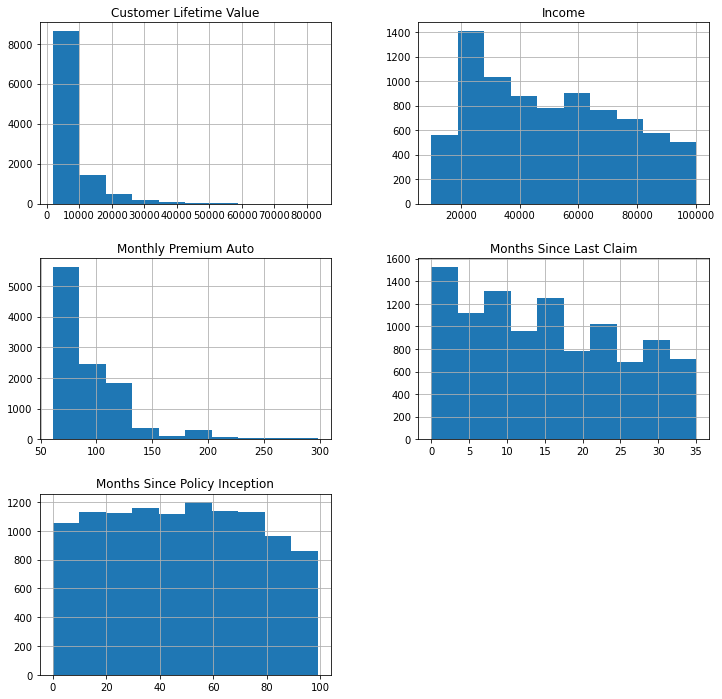

In [19]:
X_num.hist(figsize=(12,12))

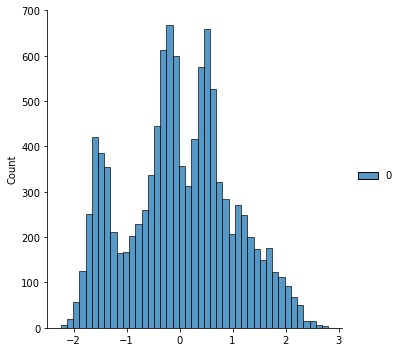

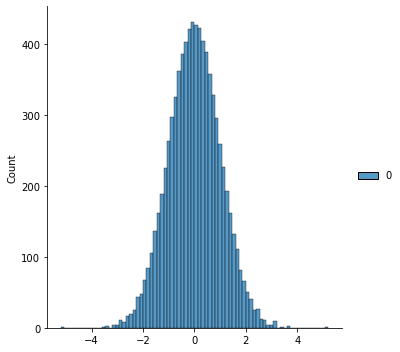

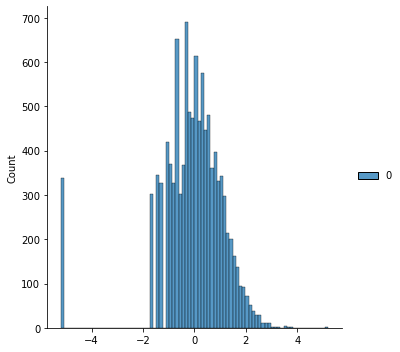

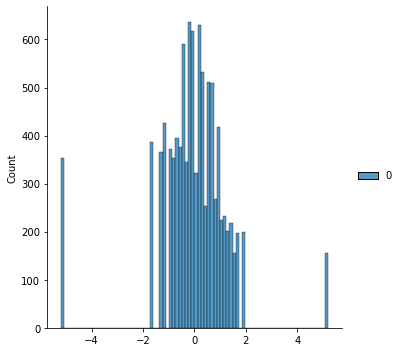

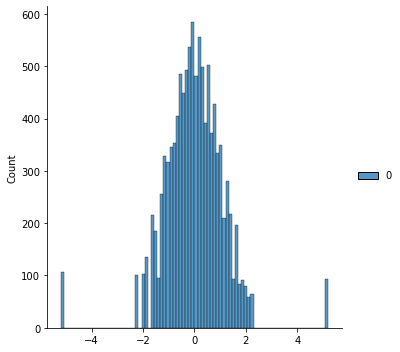

In [20]:

pt = PowerTransformer(method = "box-cox")
Customer_Lifetime_Value_transformed=pt.fit_transform(X_num['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(Customer_Lifetime_Value_transformed)
#replace - Add transformed column and drop the one not transformed:
X_num["Customer_Lifetime_Value_transformed"]= Customer_Lifetime_Value_transformed
X_num.drop(['Customer Lifetime Value'],axis=1,inplace=True)

qt = QuantileTransformer(output_distribution="normal")
Income_Transformed = qt.fit_transform(X_num["Income"].to_numpy().reshape(-1,1))
sns.displot(Income_Transformed)
#replace
X_num["Income_Transformed"]= Income_Transformed
X_num.drop(["Income"],axis=1,inplace=True)

qt = QuantileTransformer(output_distribution="normal")
Monthly_Premium_Auto_transformed = qt.fit_transform(X_num["Monthly Premium Auto"].to_numpy().reshape(-1,1))
sns.displot(Monthly_Premium_Auto_transformed)
#replace
X_num["Monthly_Premium_Auto_transformed"]= Monthly_Premium_Auto_transformed
X_num.drop(["Monthly Premium Auto"],axis=1,inplace=True)

qt = QuantileTransformer(output_distribution="normal")
Months_Since_Last_Claim_transformed = qt.fit_transform(X["Months Since Last Claim"].to_numpy().reshape(-1,1))
sns.displot(Months_Since_Last_Claim_transformed)
#replace
X_num["Months_Since_Last_Claim_transformed"]= Months_Since_Last_Claim_transformed
X_num.drop(["Months Since Last Claim"],axis=1,inplace=True)

qt = QuantileTransformer(output_distribution="normal")
Months_Since_Policy_Inception_transformed = qt.fit_transform(X_num["Months Since Policy Inception"].to_numpy().reshape(-1,1))
sns.displot(Months_Since_Policy_Inception_transformed)
#replace
X_num["Months_Since_Policy_Inception_transformed"]= Months_Since_Policy_Inception_transformed
X_num.drop(["Months Since Policy Inception"],axis=1,inplace=True)






In [21]:

#drop column with customwer IDs

X_cat.drop('Customer', axis=1, inplace=True)

/Users/macbookpro/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
X_cat = pd.get_dummies(X_cat, drop_first=True)
X_cat

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.0,1,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.0,2,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0.0,2,0,0,1,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
4,NaN,7,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,NaN,7,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
10869,0.0,6,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
10870,0.0,2,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
10871,4.0,6,1,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0


In [23]:
X = pd.concat([X_cat,X_num], axis=1)
X

,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer_Lifetime_Value_transformed,Income_Transformed,Monthly_Premium_Auto_transformed,Months_Since_Last_Claim_transformed,Months_Since_Policy_Inception_transformed
0,0.0,9,0,0,0,0,0,0,0,1,...,0,0,0,1,0,-0.335729,-0.005302,-5.199338,-0.592444,0.110627
1,0.0,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,-1.867039,NaN,-1.250242,-1.132898,-0.622621
2,0.0,2,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1.291299,-1.171612,0.391137,1.959536,-0.464007
3,0.0,2,0,0,1,0,1,1,0,1,...,0,0,0,1,0,1.729789,0.026349,0.326900,-0.332198,-1.817968
4,NaN,7,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0.645827,-1.022116,0.991746,NaN,-0.464007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,NaN,7,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1.338187,NaN,2.575483,NaN,-0.213636
10869,0.0,6,0,0,1,0,0,0,0,1,...,0,0,0,1,0,-0.182742,0.392413,-1.081940,-0.592444,0.567211
10870,0.0,2,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1.797742,-0.231884,2.111826,-0.245840,0.425228
10871,4.0,6,1,0,0,0,0,0,1,1,...,1,0,0,1,0,1.021200,0.490788,1.621918,-5.199338,-0.592444


In [25]:
# Data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=123)